ASSESSMENT -1 

In [2]:
import pandas as pd

banks = pd.read_csv("banklist.csv")

In [3]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [5]:
banks.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [6]:
num_states = banks['ST'].nunique() 
print(f"Number of States: {num_states}")

Number of States: 44


In [7]:
all_states = banks['ST'].unique() 
print(all_states)

['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


In [8]:
top_5_states = banks['ST'].value_counts().head(5) 
print(top_5_states)

ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


In [9]:
top_5_acquiring_institutions = banks['Acquiring Institution'].value_counts().head(5) 
print(top_5_acquiring_institutions)

Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


In [10]:
banks_acquired_by_texas = banks[banks['Acquiring Institution'] == 'State Bank of Texas'].shape[0]
print(f"Number of banks acquired by State Bank of Texas: {banks_acquired_by_texas}")

texas_banks_acquired_by_texas = banks[(banks['Acquiring Institution'] == 'State Bank of Texas') & (banks['ST'] == 'TX')].shape[0]
print(f"Number of Texas banks acquired by State Bank of Texas: {texas_banks_acquired_by_texas}")

Number of banks acquired by State Bank of Texas: 3
Number of Texas banks acquired by State Bank of Texas: 1


In [11]:
california_failures = banks[banks['ST'] == 'CA']
most_common_city_ca = california_failures['City'].value_counts().idxmax()
print(f"Most common city in California for bank failures: {most_common_city_ca}")

Most common city in California for bank failures: Los Angeles


ASSESSMENT -2

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("historical_automobile_sales.csv")




In [13]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [14]:
df.tail(50)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
478,7/31/2019,2019,Jul,0,93.82,0.50,33224.839,4217,7,50.627,0.510222,1.8,2426.3,Sports,Illinois
479,8/31/2019,2019,Aug,0,118.96,0.25,23754.820,3175,6,39.892,-0.269102,1.3,923.2,Smallfamiliycar,California
480,9/30/2019,2019,Sep,0,117.09,0.07,27882.785,4924,3,63.549,0.372264,1.1,3240.6,Smallfamiliycar,Georgia
481,10/31/2019,2019,Oct,0,95.87,0.12,26556.251,3089,9,25.013,-1.540639,2.8,4456.9,Mediumfamilycar,Georgia
482,11/30/2019,2019,Nov,0,103.90,0.25,40394.404,2379,9,51.813,0.517245,2.7,4465.5,Smallfamiliycar,California
483,12/31/2019,2019,Dec,0,112.04,0.34,30597.875,1040,6,47.750,-0.085089,1.1,3472.2,Executivecar,California
484,1/31/2020,2020,Jan,0,106.81,0.50,24360.412,3981,7,29.627,-0.611706,1.5,1485.2,Sports,California
485,2/29/2020,2020,Feb,0,97.27,0.75,20222.298,3081,8,20.423,-0.450668,1.2,4377.1,Executivecar,New York
486,3/31/2020,2020,Mar,0,92.51,1.50,16967.768,4088,5,50.295,0.593936,2.6,4479.6,Sports,Illinois
487,4/30/2020,2020,Apr,0,108.68,1.00,26017.318,2700,7,55.339,0.091147,1.8,1024.5,Mediumfamilycar,California


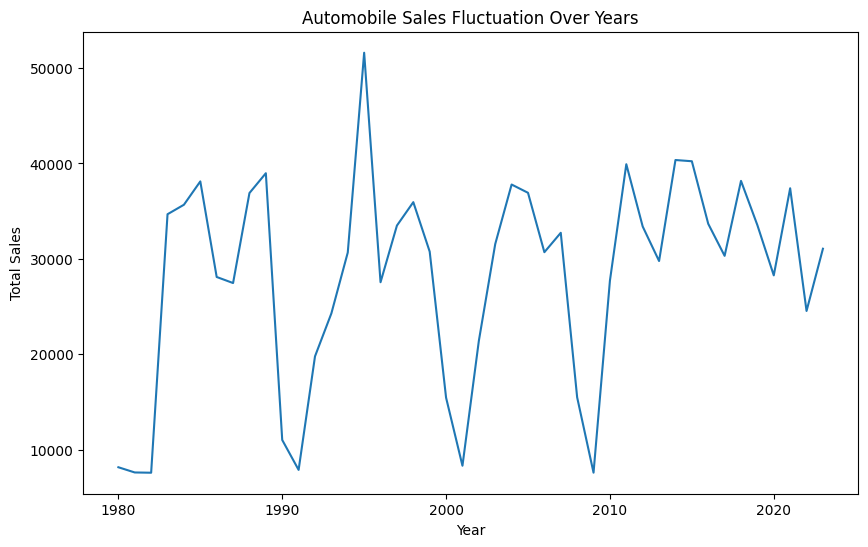

In [20]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()


yearly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Automobile Sales Fluctuation Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


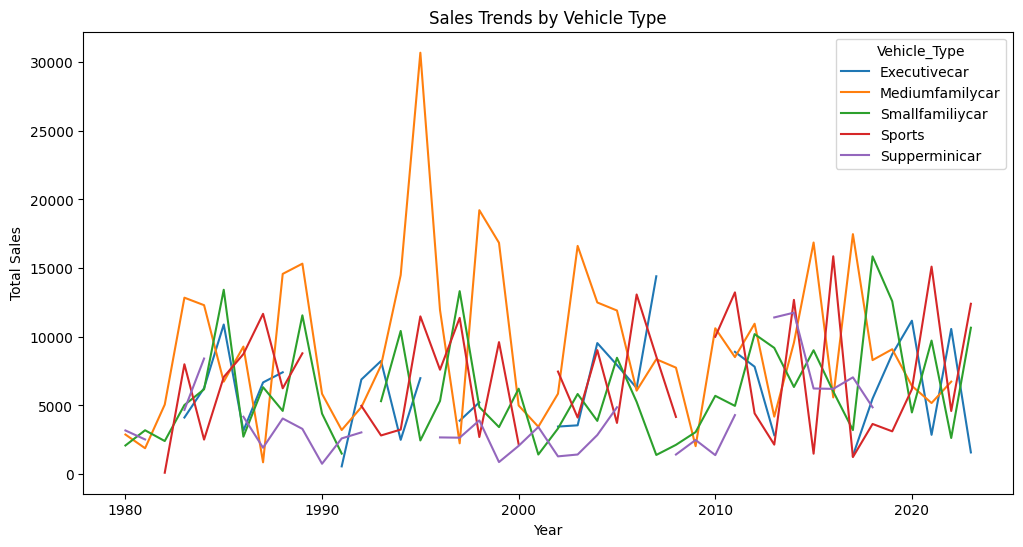

In [21]:

sales_by_year_type = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()


sales_by_year_type.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trends by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Vehicle_Type')
plt.show()



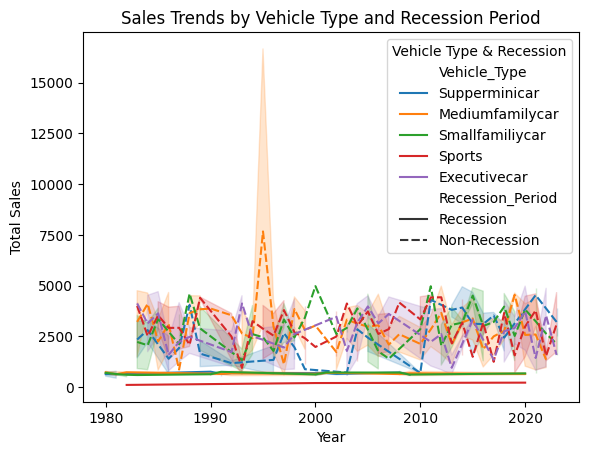

In [22]:
import seaborn as sns

df['Recession_Period'] = df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession_Period', data=df)
plt.title('Sales Trends by Vehicle Type and Recession Period')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Vehicle Type & Recession')
plt.show()

In [23]:
avg_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

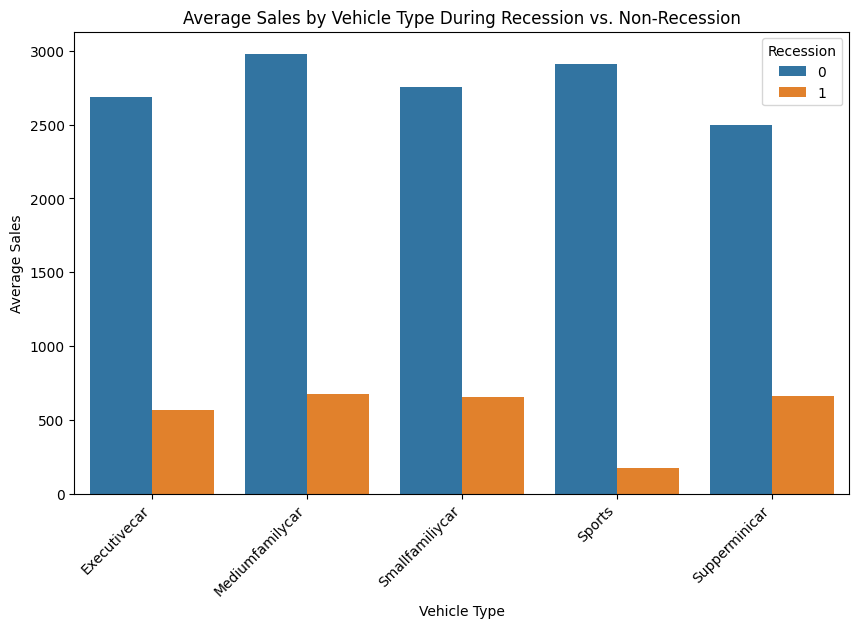

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=avg_sales)
plt.title('Average Sales by Vehicle Type During Recession vs. Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Sales')
plt.legend(title='Recession')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()